### 2.분류 모델을 사용해서 건강검진 데이터를 바탕으로 전날 음주여부를 예측해 봅니다. 예측 모델 만들어서 모든 분류 알고리즘을 적용하여 모델별로 정확도, 정밀도, 재현율, F1-Score, AUC 값을 구하여 엑셀로 만들어서 소스파일과 함께 제출하시오. 또한 train, validation, test 테이터를 생성하여 각 데이터별 정확도 점수를 시각화한후에 평가 결과(쥬피터 노트북)를 작성하세요(데이터 분할은 Random_State=42 적용) (엑셀로 만들어서 소스파일과 함께 제출하시오)


In [1]:
import pandas as pd
health = pd.read_csv('health.csv')
health.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,701999,1,11,41,160.0,70.0,88.0,0.6,0.3,...,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
1,2017,47933,1,13,41,165.0,70.0,91.0,0.5,0.6,...,21.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
2,2017,122314,2,8,47,160.0,55.0,73.0,0.9,1.0,...,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,401875,1,11,41,170.0,70.0,82.0,0.4,0.5,...,17.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,252501,1,13,26,155.0,50.0,90.0,1.2,1.2,...,53.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [2]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          10000 non-null  int64  
 1   가입자일련번호       10000 non-null  int64  
 2   성별코드          10000 non-null  int64  
 3   연령대코드(5세단위)   10000 non-null  int64  
 4   시도코드          10000 non-null  int64  
 5   신장(5Cm단위)     9999 non-null   float64
 6   체중(5Kg 단위)    9999 non-null   float64
 7   허리둘레          10000 non-null  float64
 8   시력(좌)         9997 non-null   float64
 9   시력(우)         9997 non-null   float64
 10  청력(좌)         9999 non-null   float64
 11  청력(우)         9999 non-null   float64
 12  수축기혈압         10000 non-null  float64
 13  이완기혈압         10000 non-null  float64
 14  식전혈당(공복혈당)    10000 non-null  float64
 15  총콜레스테롤        10000 non-null  float64
 16  트리글리세라이드      10000 non-null  float64
 17  HDL콜레스테롤      10000 non-null  float64
 18  LDL콜레스테롤      9973 non-null

In [3]:
health.isnull().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           1
체중(5Kg 단위)          1
허리둘레                0
시력(좌)               3
시력(우)               3
청력(좌)               1
청력(우)               1
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)          0
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤           27
혈색소                 0
요단백                38
혈청크레아티닌             0
(혈청지오티)AST          0
(혈청지오티)ALT          0
감마지티피               0
흡연상태                1
음주여부                0
구강검진 수검여부           0
치아우식증유무         10000
결손치유무           10000
치아마모증유무         10000
제3대구치(사랑니)이상    10000
치석               6059
데이터공개일자             0
dtype: int64

In [2]:
df = health.copy()
df = df.drop(columns=['기준년도','가입자일련번호','시도코드','시력(우)','시력(좌)','청력(좌)','청력(우)','치석','제3대구치(사랑니)이상','치아마모증유무','구강검진 수검여부','결손치유무','치아우식증유무','데이터공개일자'])
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,11,160.0,70.0,88.0,110.0,62.0,113.0,206.0,102.0,39.0,147.0,12.2,4.0,5.0,12.0,11.0,14.0,2.0,0.0
1,1,13,165.0,70.0,91.0,112.0,67.0,86.0,124.0,156.0,36.0,56.0,14.6,1.0,1.2,28.0,23.0,21.0,2.0,0.0
2,2,8,160.0,55.0,73.0,104.0,60.0,96.0,166.0,99.0,43.0,103.0,9.9,1.0,0.5,15.0,9.0,17.0,1.0,1.0
3,1,11,170.0,70.0,82.0,119.0,76.0,104.0,243.0,158.0,49.0,162.0,14.8,1.0,1.0,20.0,16.0,17.0,1.0,0.0
4,1,13,155.0,50.0,90.0,128.0,84.0,97.0,267.0,243.0,51.0,167.0,15.1,1.0,0.8,44.0,29.0,53.0,3.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  int64  
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   신장(5Cm단위)    9999 non-null   float64
 3   체중(5Kg 단위)   9999 non-null   float64
 4   허리둘레         10000 non-null  float64
 5   수축기혈압        10000 non-null  float64
 6   이완기혈압        10000 non-null  float64
 7   식전혈당(공복혈당)   10000 non-null  float64
 8   총콜레스테롤       10000 non-null  float64
 9   트리글리세라이드     10000 non-null  float64
 10  HDL콜레스테롤     10000 non-null  float64
 11  LDL콜레스테롤     9973 non-null   float64
 12  혈색소          10000 non-null  float64
 13  요단백          9962 non-null   float64
 14  혈청크레아티닌      10000 non-null  float64
 15  (혈청지오티)AST   10000 non-null  float64
 16  (혈청지오티)ALT   10000 non-null  float64
 17  감마지티피        10000 non-null  float64
 18  흡연상태         9999 non-null   float64
 19  음주여부 

In [11]:
df.isnull().sum()

성별코드            0
연령대코드(5세단위)     0
신장(5Cm단위)       1
체중(5Kg 단위)      1
허리둘레            0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤       27
혈색소             0
요단백            38
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            1
음주여부            0
dtype: int64

#### LDL콜레스테롤 결측치 채우기

In [3]:
import numpy as np

# LDL콜레스테롤 계산식 적용
calculated_ldl = df['총콜레스테롤'].round() - df['HDL콜레스테롤'] - (df['트리글리세라이드'] / 5)

# 결측치만 채우기
df['LDL콜레스테롤'] = np.where(df['LDL콜레스테롤'].isnull(), calculated_ldl, df['LDL콜레스테롤'])

#### 신장, 체중, 흡연상태 결측치 처리하기

In [4]:
### 경고 무시하기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# 체중과 신장이 동시에 NaN인 행 제거
df = df.dropna(subset=['체중(5Kg 단위)', '신장(5Cm단위)'])

# 흡연상태의 결측치를 1(비흡연)으로 채우기
df['흡연상태'].fillna(1, inplace=True)

In [7]:
df.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

#### 상관관계 분석

음주여부           1.000000
신장(5Cm단위)      0.373625
흡연상태           0.347362
혈색소            0.304742
체중(5Kg 단위)     0.271942
감마지티피          0.213437
허리둘레           0.133674
이완기혈압          0.110223
트리글리세라이드       0.107297
(혈청지오티)ALT     0.083536
혈청크레아티닌        0.077350
(혈청지오티)AST     0.054130
수축기혈압          0.050832
HDL콜레스테롤       0.043241
식전혈당(공복혈당)     0.028942
총콜레스테롤         0.023724
LDL콜레스테롤      -0.042710
연령대코드(5세단위)   -0.297441
성별코드          -0.366516
Name: 음주여부, dtype: float64


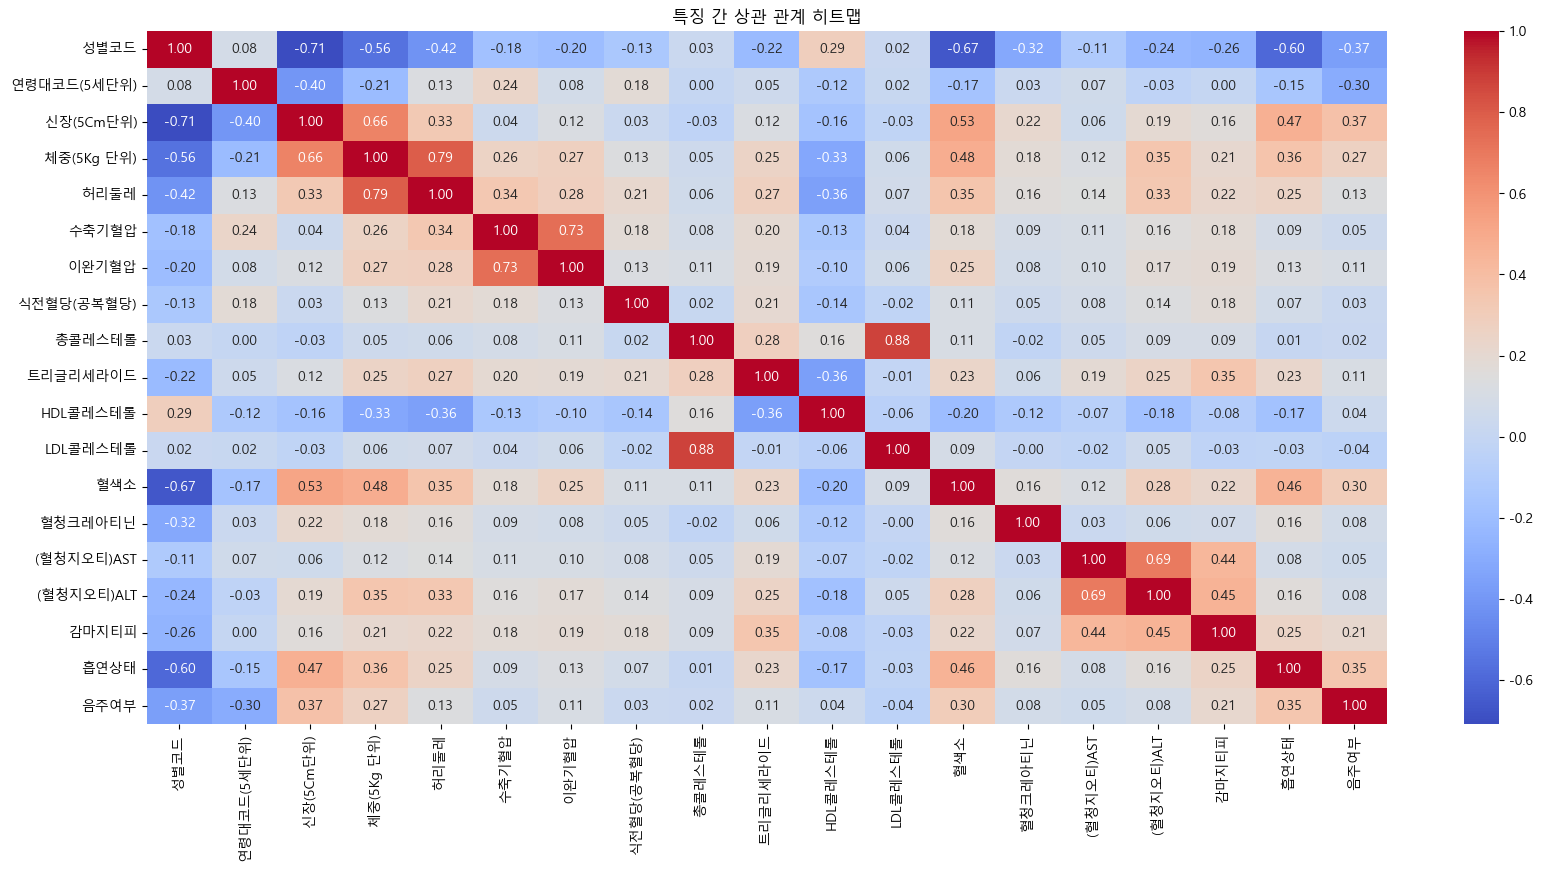

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows (맑은 고딕)
mpl.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결

# 상관 행렬 계산
corr_matrix = df.corr()

# 음주여부 와 다른 변수들의 상관관계 계산
drink_corr = df.corr()['음주여부'].sort_values(ascending=False)
print(drink_corr)

# 히트맵 그리기
plt.figure(figsize=(20, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("특징 간 상관 관계 히트맵") 
plt.show()

#### 이상치 그래프

#### 연속형 변수 

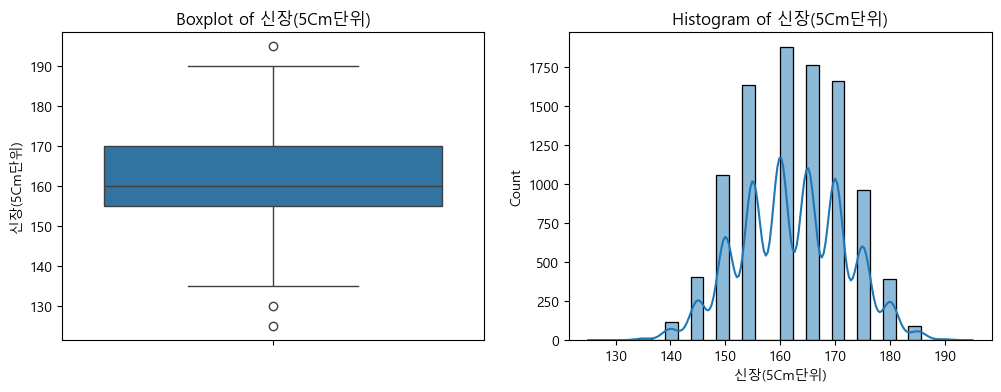

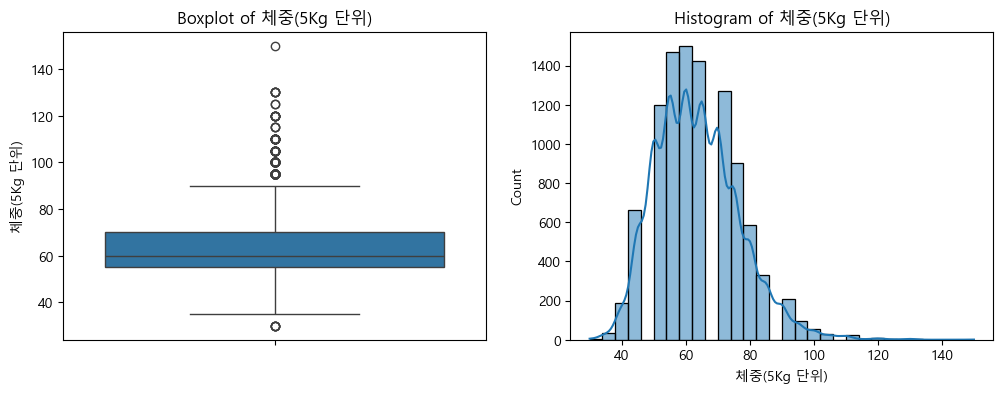

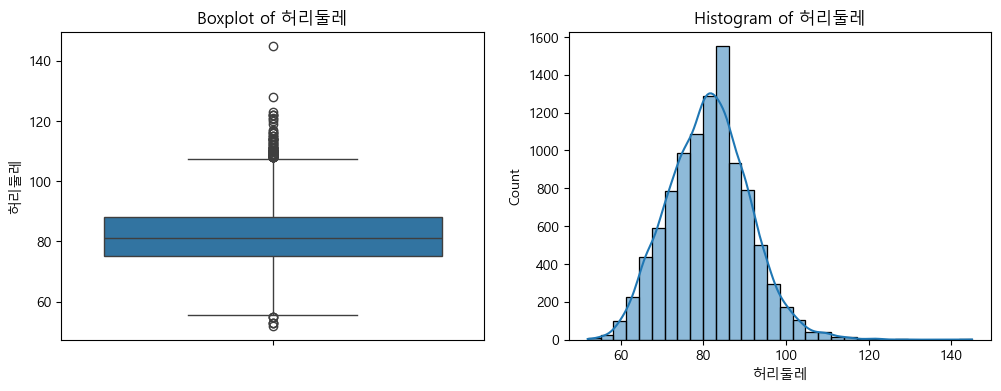

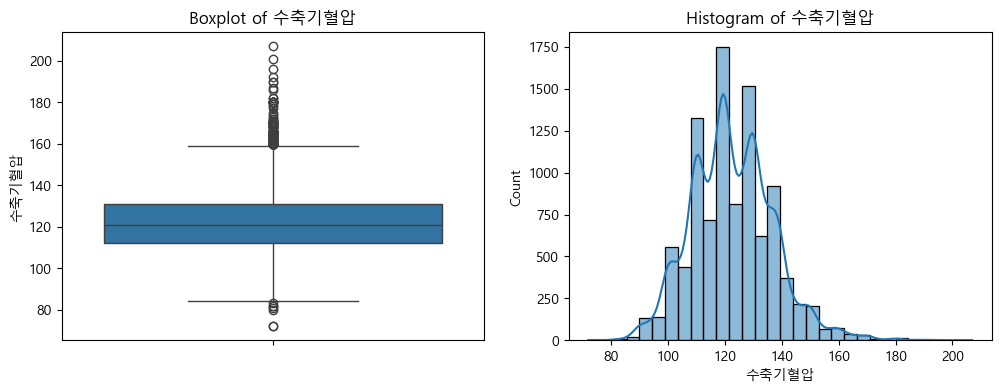

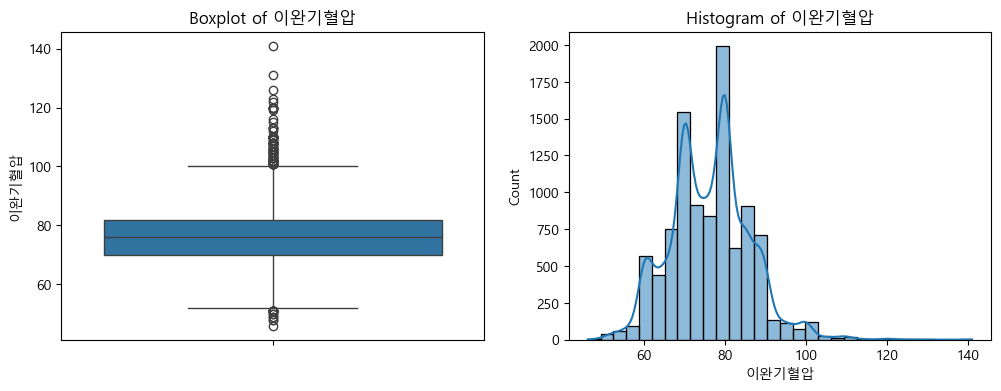

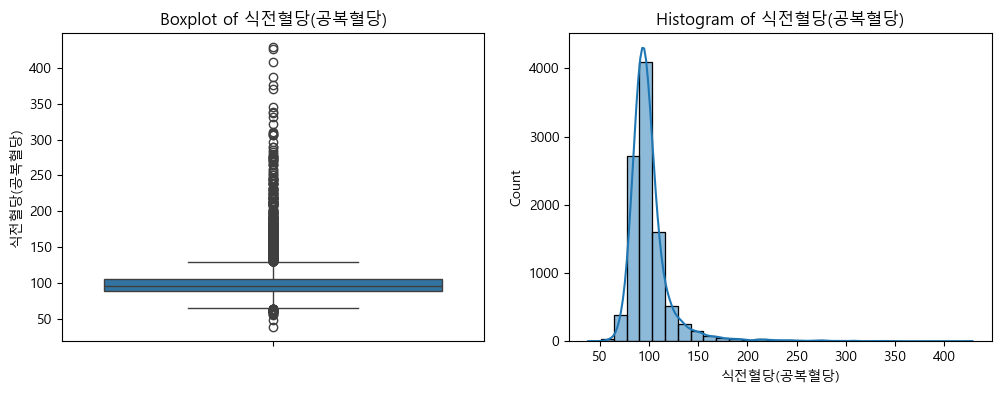

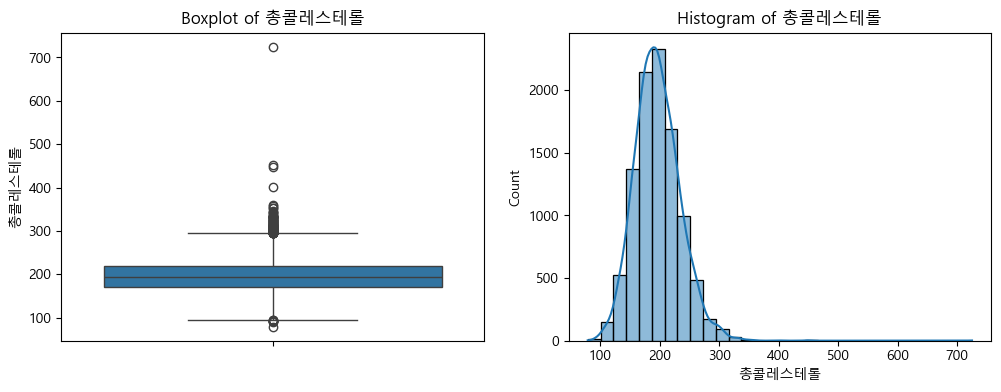

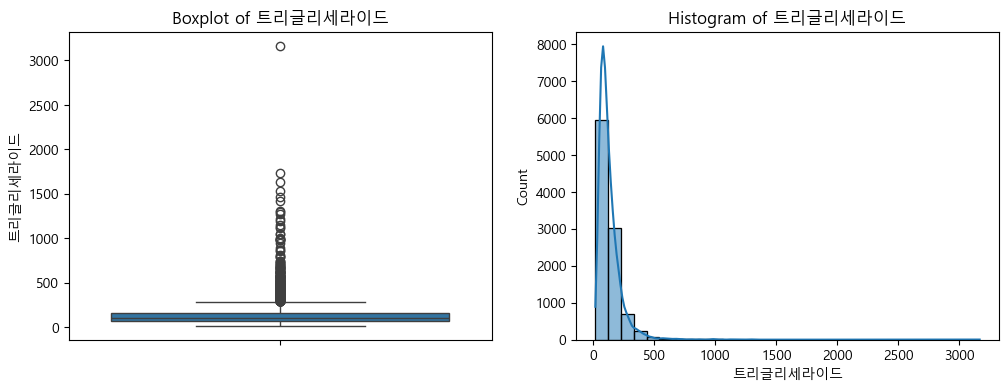

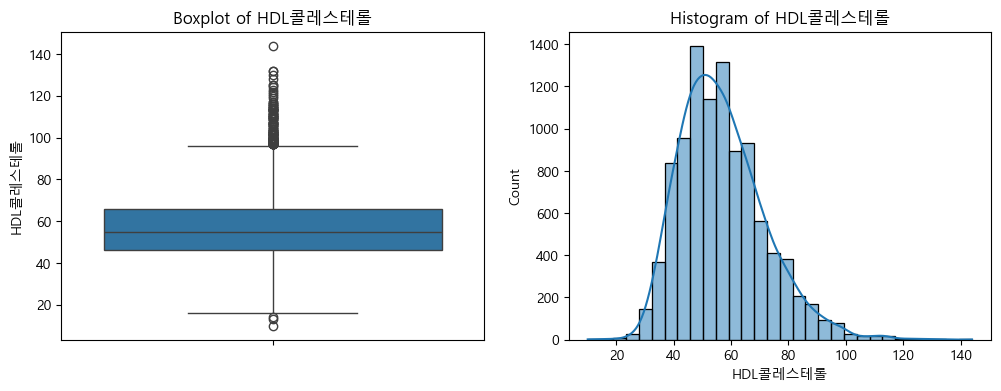

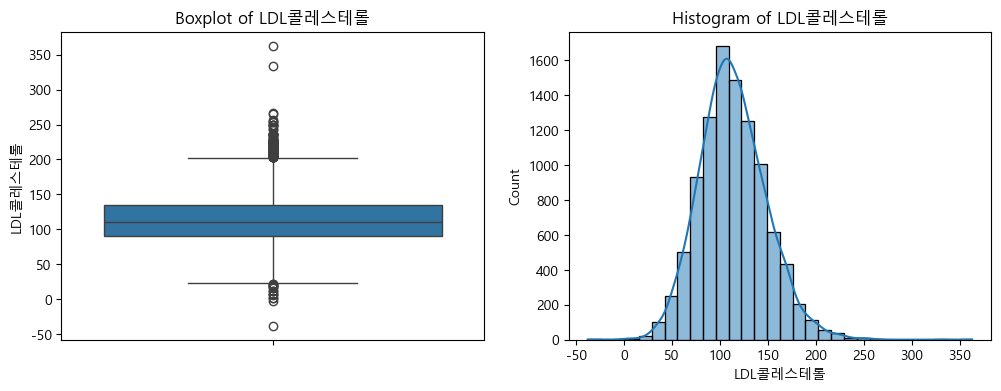

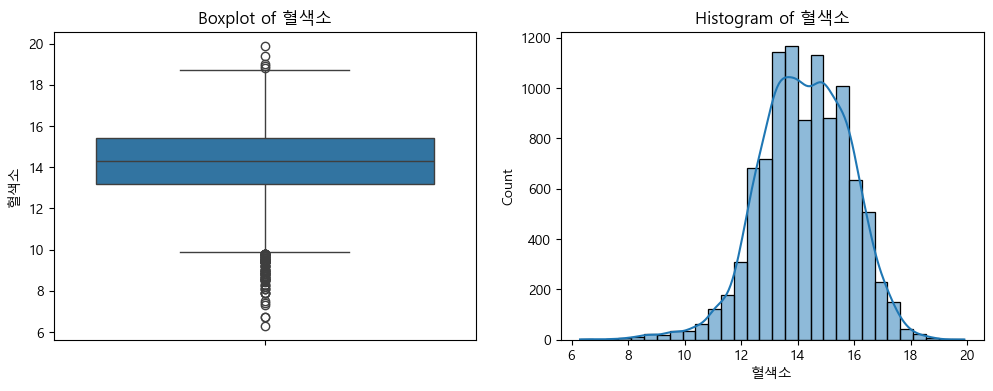

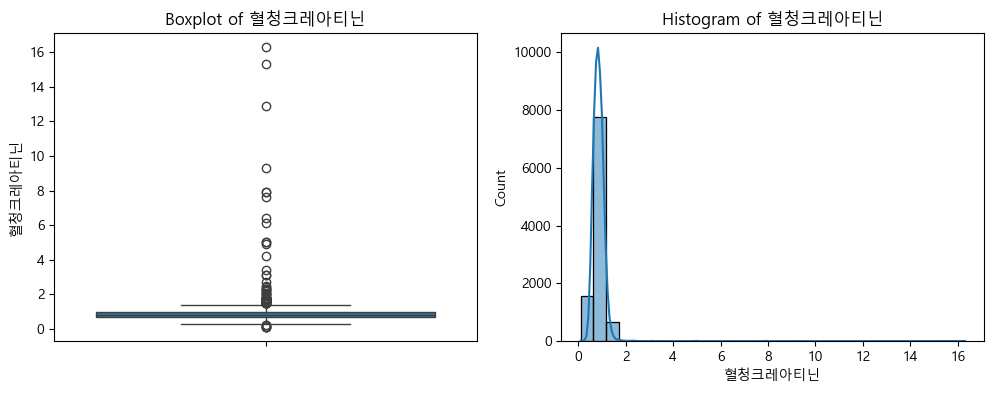

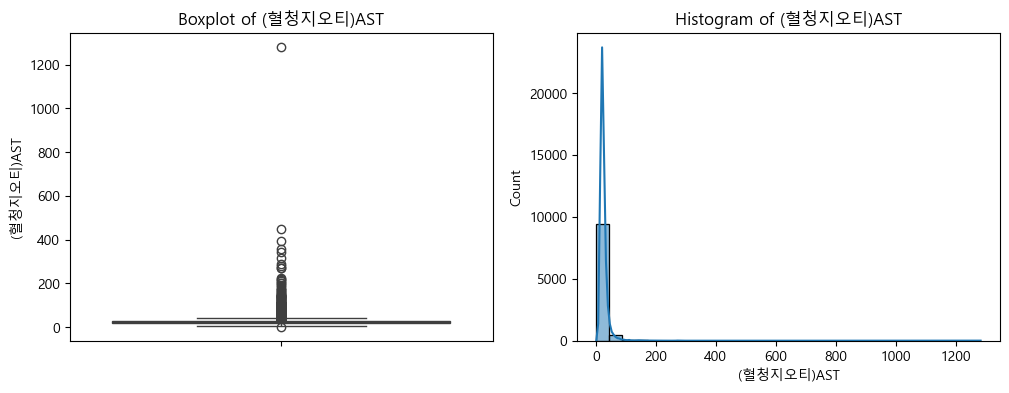

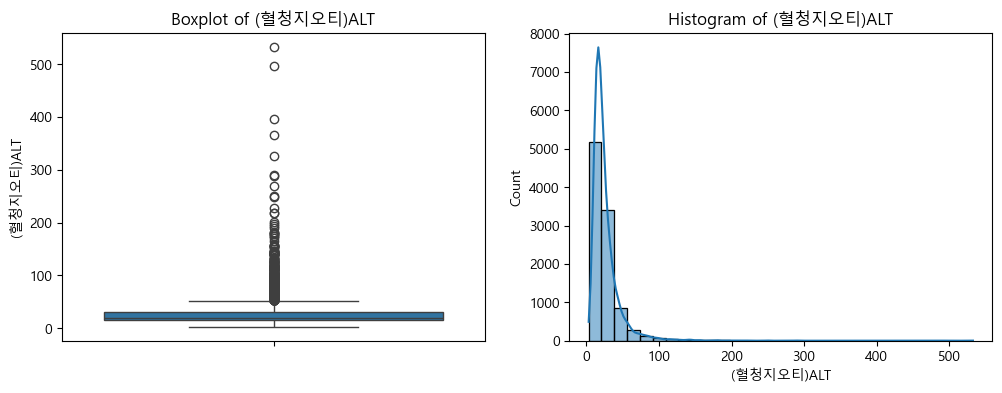

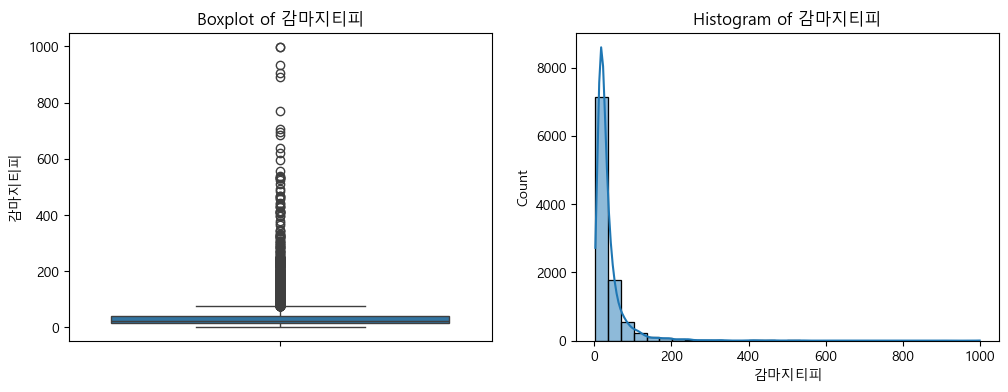

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 변수 리스트
continuous_cols = [
    '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기혈압', '이완기혈압',
    '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
    '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피'
]

# 각 변수별 Boxplot & Histogram 그리기
for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Boxplot (이상치 확인)
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')
    
    # Histogram (분포 확인)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of {col}')
    
    plt.show()


#### 범주형 변수

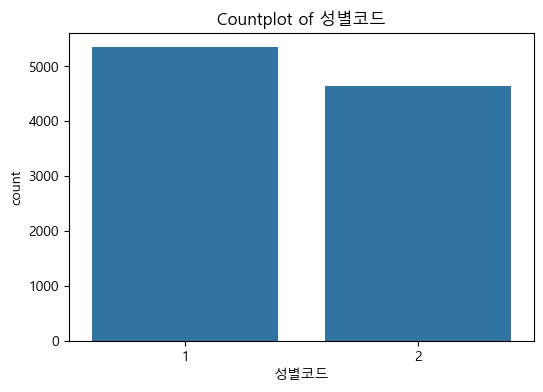

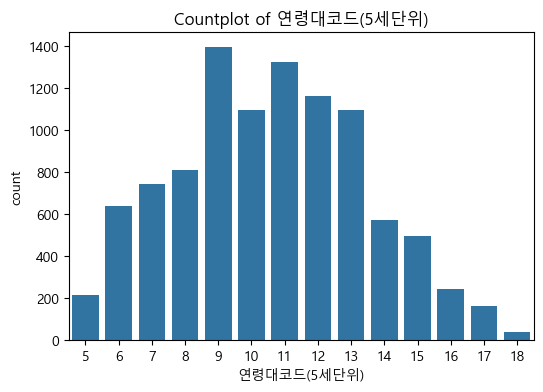

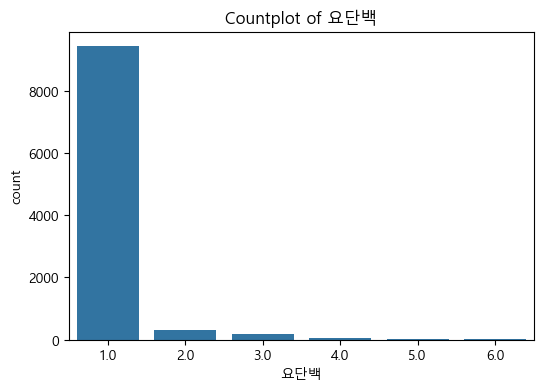

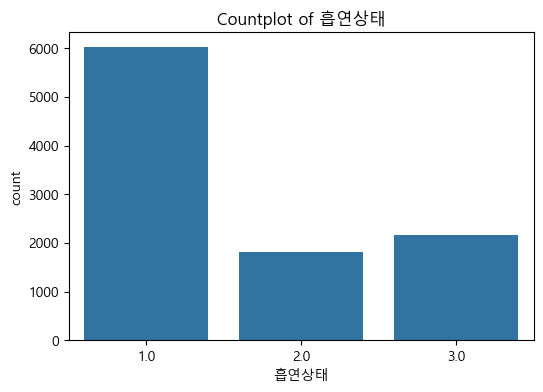

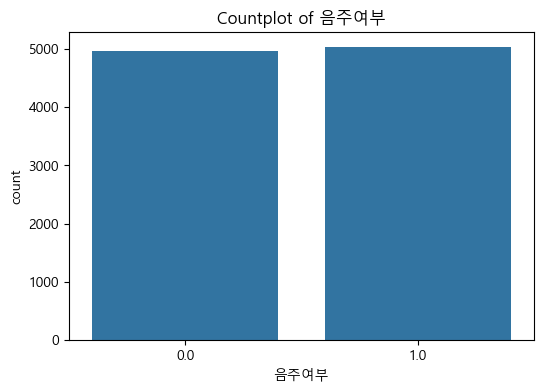

In [27]:
# 범주형 변수 리스트
categorical_cols = ['성별코드', '연령대코드(5세단위)', '요단백', '흡연상태', '음주여부']

# Countplot 그리기
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()


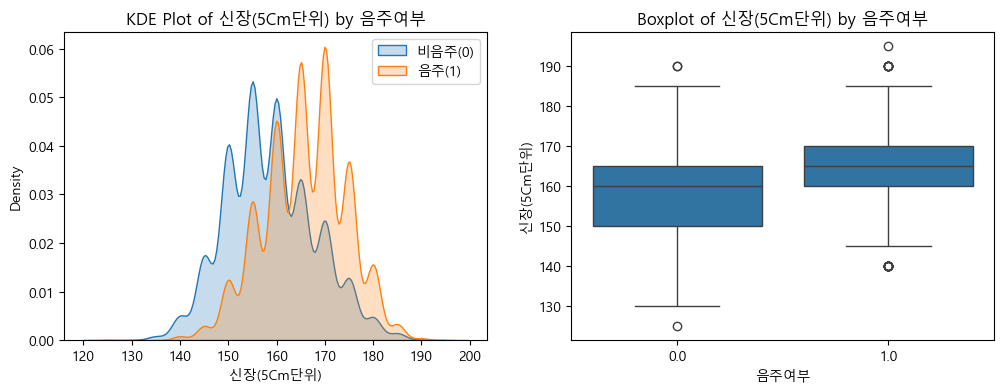

신장(5Cm단위) - KS Test 결과: 통계량(stat) = 0.3441, p-value = 0.0000
➡ 변수 '신장(5Cm단위)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



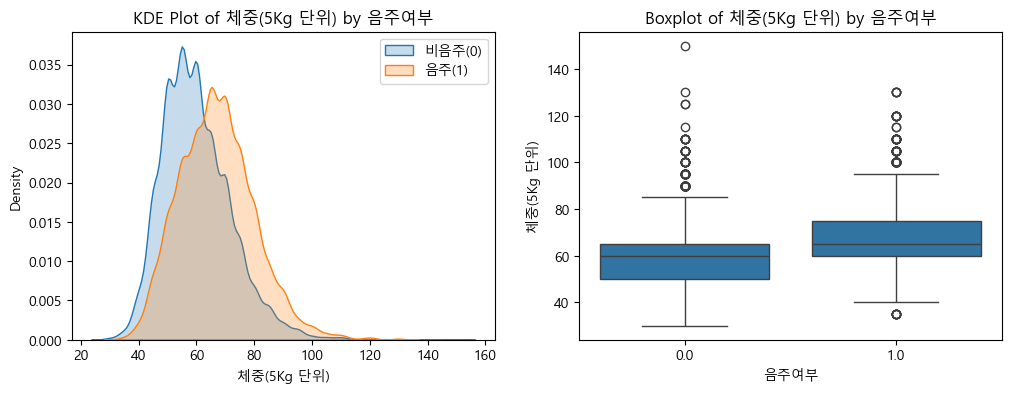

체중(5Kg 단위) - KS Test 결과: 통계량(stat) = 0.2638, p-value = 0.0000
➡ 변수 '체중(5Kg 단위)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



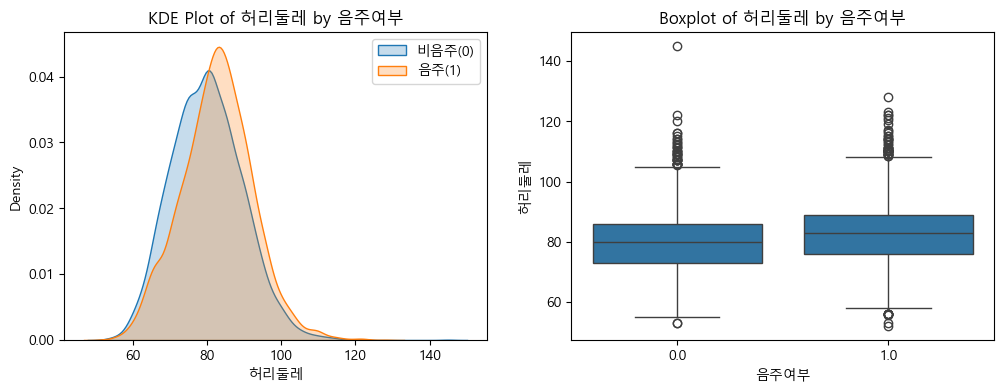

허리둘레 - KS Test 결과: 통계량(stat) = 0.1354, p-value = 0.0000
➡ 변수 '허리둘레' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



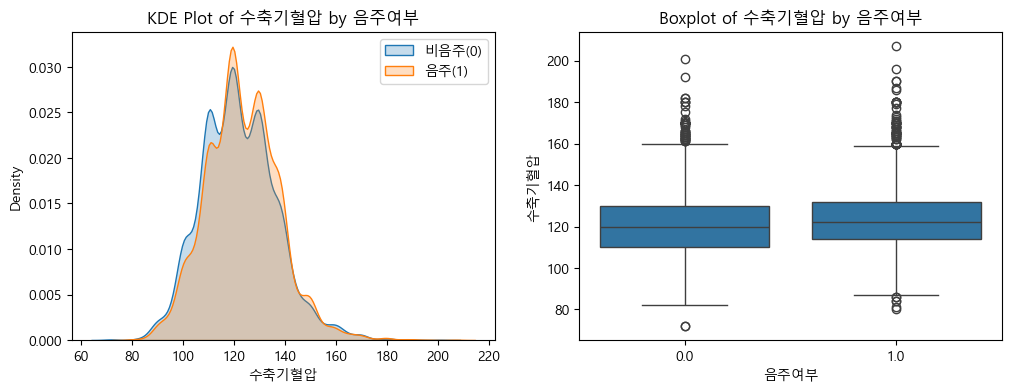

수축기혈압 - KS Test 결과: 통계량(stat) = 0.0573, p-value = 0.0000
➡ 변수 '수축기혈압' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



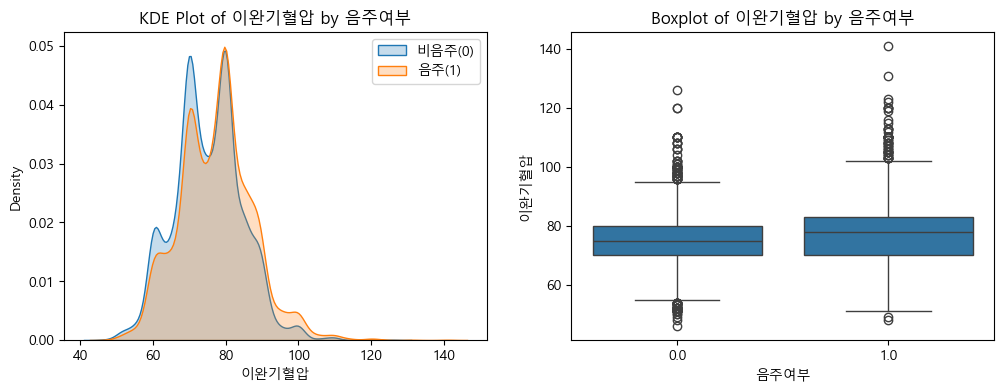

이완기혈압 - KS Test 결과: 통계량(stat) = 0.0910, p-value = 0.0000
➡ 변수 '이완기혈압' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



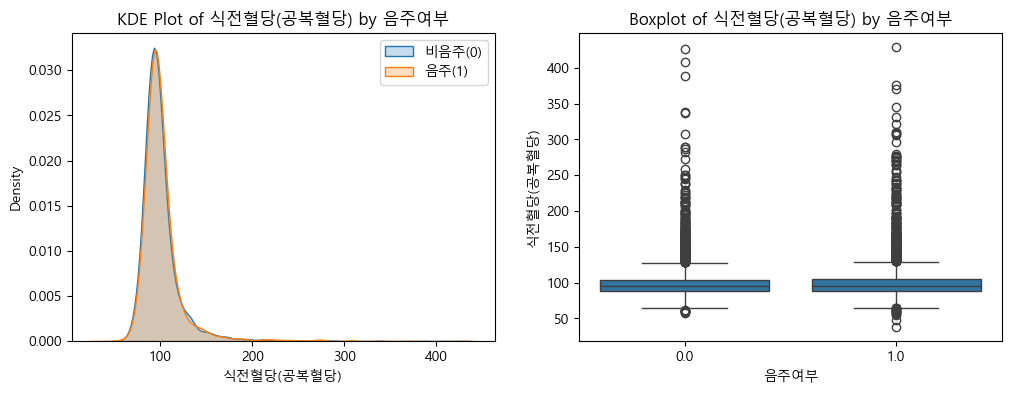

식전혈당(공복혈당) - KS Test 결과: 통계량(stat) = 0.0421, p-value = 0.0003
➡ 변수 '식전혈당(공복혈당)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



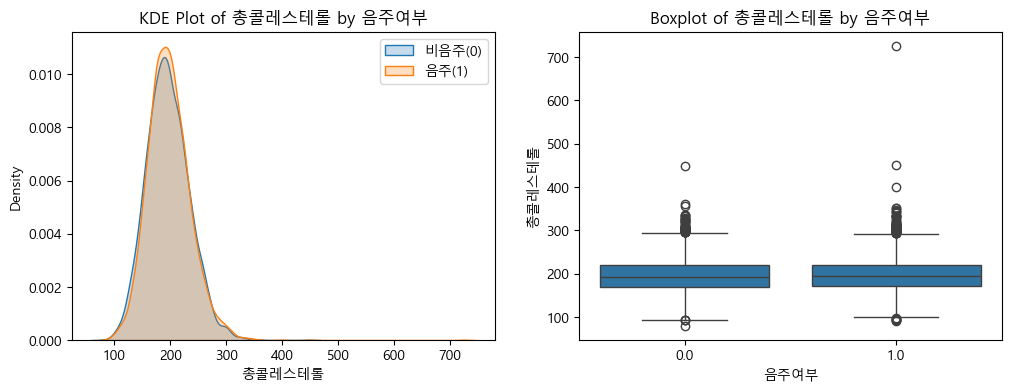

총콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0305, p-value = 0.0187
➡ 변수 '총콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



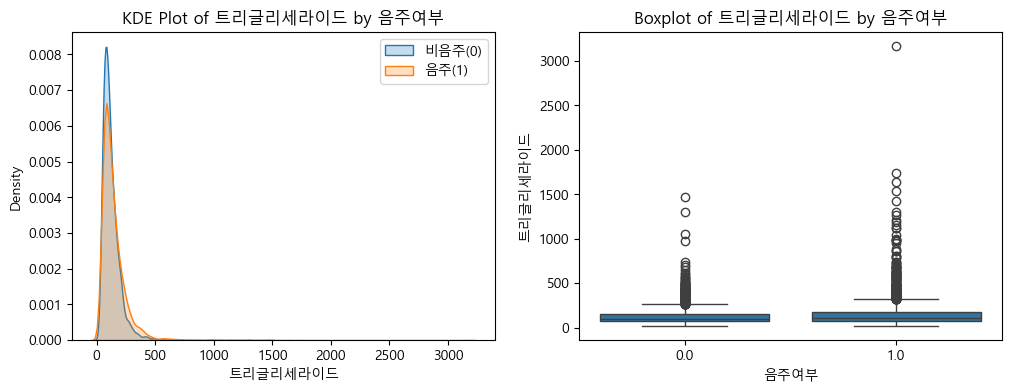

트리글리세라이드 - KS Test 결과: 통계량(stat) = 0.0836, p-value = 0.0000
➡ 변수 '트리글리세라이드' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



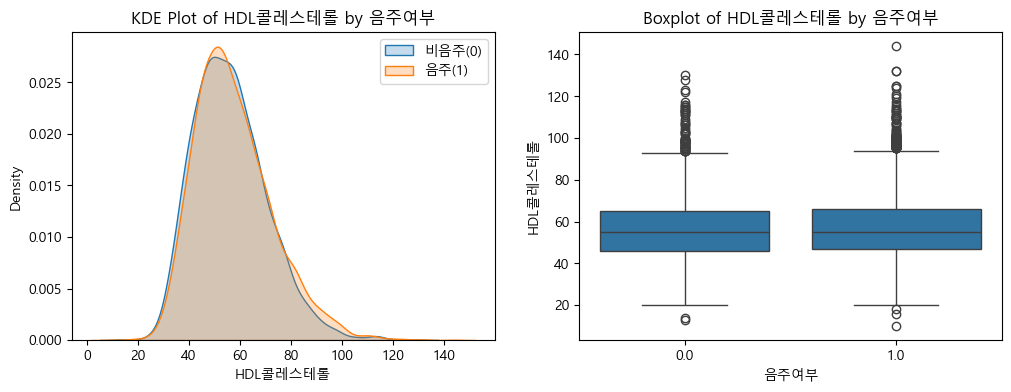

HDL콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0296, p-value = 0.0246
➡ 변수 'HDL콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



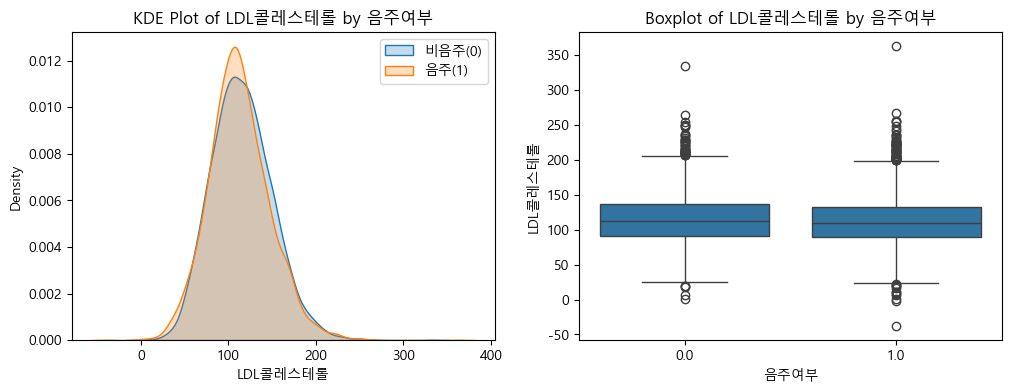

LDL콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0540, p-value = 0.0000
➡ 변수 'LDL콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



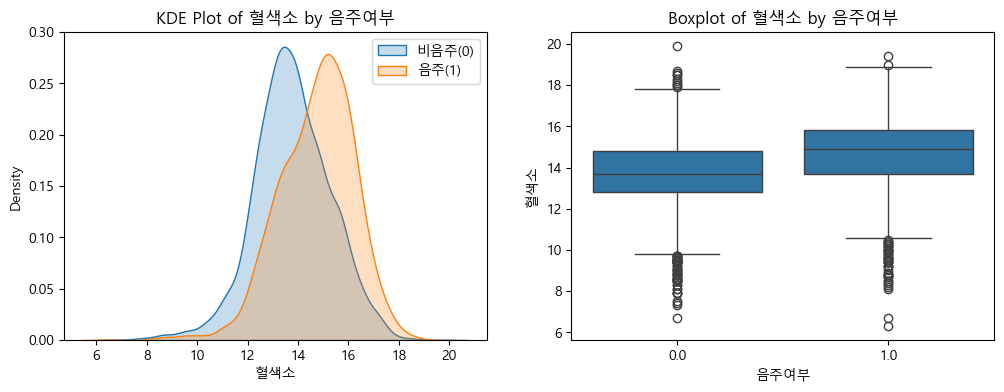

혈색소 - KS Test 결과: 통계량(stat) = 0.3049, p-value = 0.0000
➡ 변수 '혈색소' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



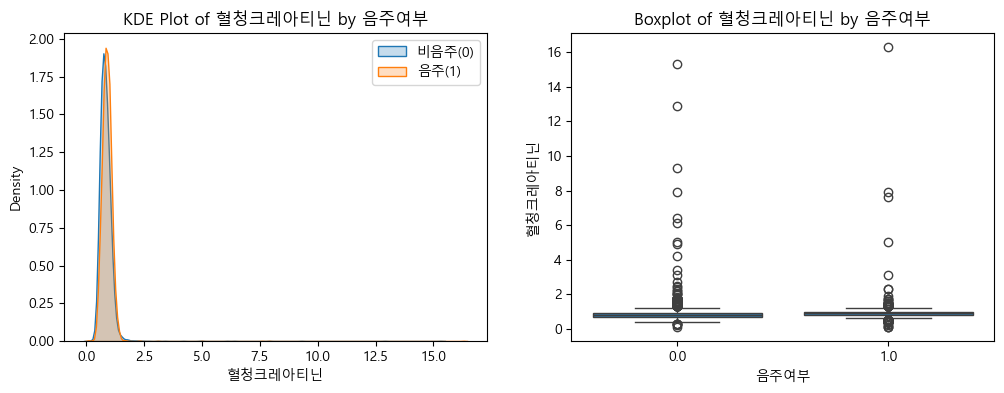

혈청크레아티닌 - KS Test 결과: 통계량(stat) = 0.1654, p-value = 0.0000
➡ 변수 '혈청크레아티닌' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



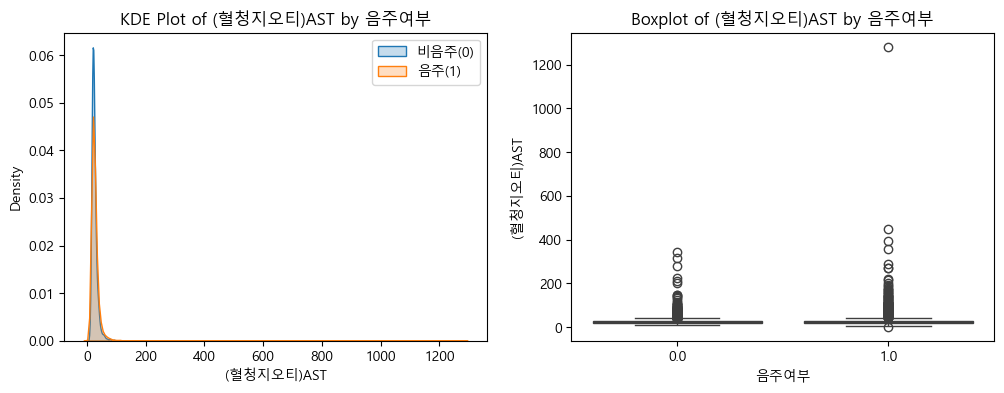

(혈청지오티)AST - KS Test 결과: 통계량(stat) = 0.0583, p-value = 0.0000
➡ 변수 '(혈청지오티)AST' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



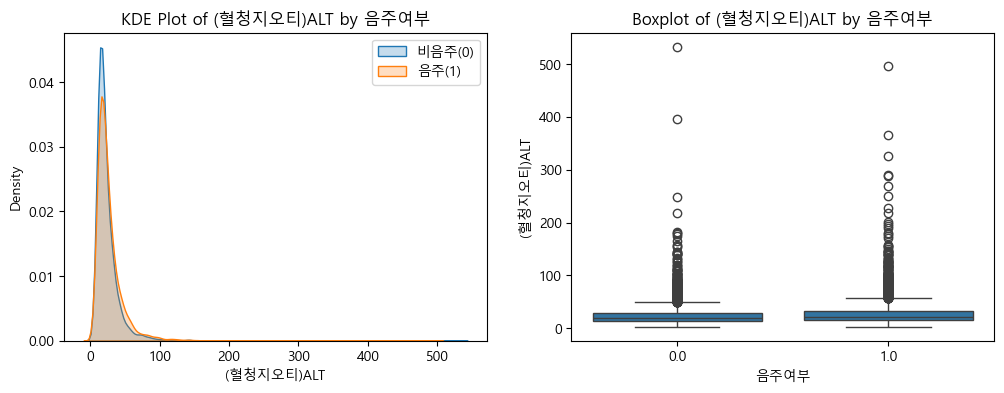

(혈청지오티)ALT - KS Test 결과: 통계량(stat) = 0.0946, p-value = 0.0000
➡ 변수 '(혈청지오티)ALT' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



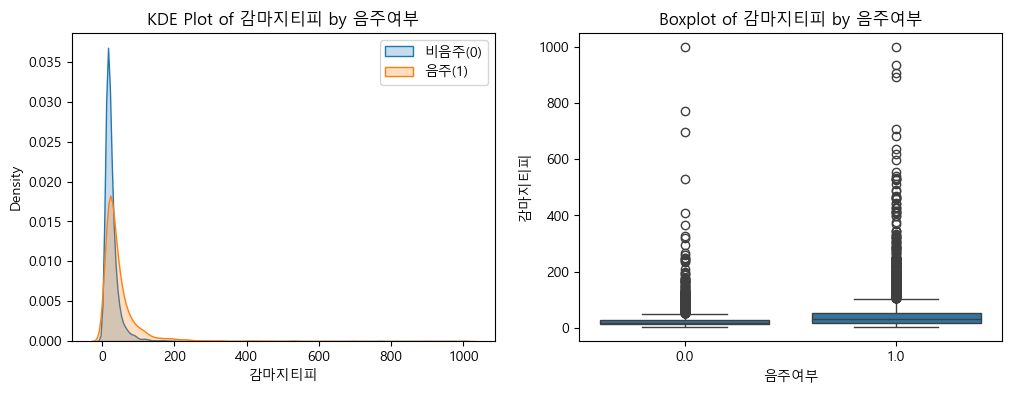

감마지티피 - KS Test 결과: 통계량(stat) = 0.2677, p-value = 0.0000
➡ 변수 '감마지티피' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# 연속형 변수 리스트
continuous_cols = [
    '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기혈압', '이완기혈압',
    '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
    '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피'
]

for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # KDE Plot (음주여부별 분포)
    sns.kdeplot(df[df['음주여부'] == 0][col], label="비음주(0)", shade=True, ax=axes[0])
    sns.kdeplot(df[df['음주여부'] == 1][col], label="음주(1)", shade=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col} by 음주여부')
    axes[0].legend()
    
    # Boxplot (음주여부별 값 비교)
    sns.boxplot(x=df['음주여부'], y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} by 음주여부')

    plt.show()

    # KS 검정 수행
    stat, p_value = ks_2samp(df[df['음주여부'] == 0][col], df[df['음주여부'] == 1][col])
    print(f"{col} - KS Test 결과: 통계량(stat) = {stat:.4f}, p-value = {p_value:.4f}")

    # p-value 해석
    if p_value < 0.05:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)\n")
    else:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부에 따라 유의미한 차이가 없음 (p >= 0.05)\n")

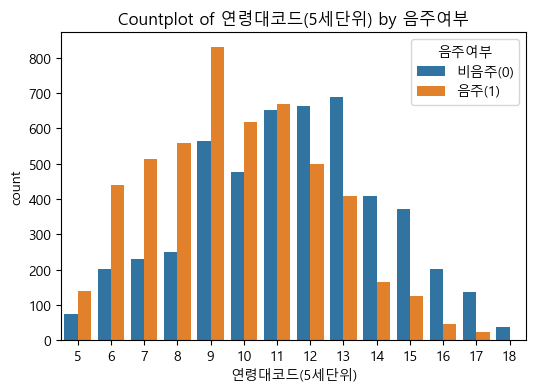

 연령대코드(5세단위) - Chi-Square Test 결과: 카이제곱 통계량 = 933.2975, p-value = 0.0000
➡ 변수 '연령대코드(5세단위)' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)



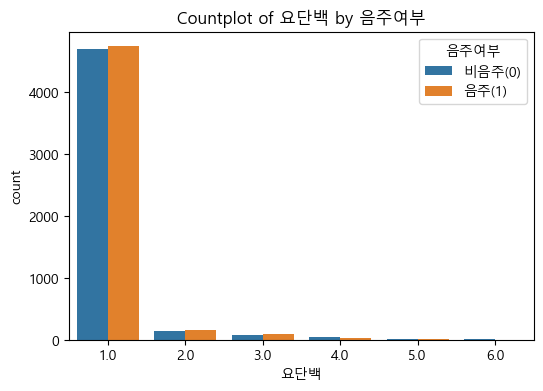

 요단백 - Chi-Square Test 결과: 카이제곱 통계량 = 8.6856, p-value = 0.1223
➡ 변수 '요단백' 은(는) 음주 여부와 유의미한 연관이 없음 (p >= 0.05)



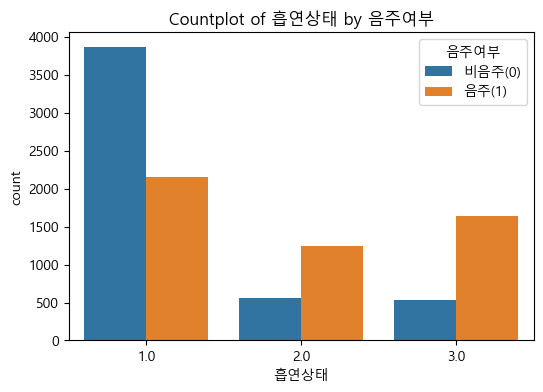

 흡연상태 - Chi-Square Test 결과: 카이제곱 통계량 = 1305.0983, p-value = 0.0000
➡ 변수 '흡연상태' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)



In [13]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 범주형 변수 리스트 (성별 제외)
categorical_cols = ['연령대코드(5세단위)', '요단백', '흡연상태']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="음주여부", data=df)
    plt.title(f'Countplot of {col} by 음주여부')
    plt.legend(title="음주여부", labels=["비음주(0)", "음주(1)"])
    plt.show()

    # 카이제곱 검정 수행
    contingency_table = pd.crosstab(df[col], df['음주여부'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    print(f" {col} - Chi-Square Test 결과: 카이제곱 통계량 = {chi2:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)\n")
    else:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부와 유의미한 연관이 없음 (p >= 0.05)\n")


In [6]:
df = df.drop(columns=['요단백'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         9999 non-null   int64  
 1   연령대코드(5세단위)  9999 non-null   int64  
 2   신장(5Cm단위)    9999 non-null   float64
 3   체중(5Kg 단위)   9999 non-null   float64
 4   허리둘레         9999 non-null   float64
 5   수축기혈압        9999 non-null   float64
 6   이완기혈압        9999 non-null   float64
 7   식전혈당(공복혈당)   9999 non-null   float64
 8   총콜레스테롤       9999 non-null   float64
 9   트리글리세라이드     9999 non-null   float64
 10  HDL콜레스테롤     9999 non-null   float64
 11  LDL콜레스테롤     9999 non-null   float64
 12  혈색소          9999 non-null   float64
 13  혈청크레아티닌      9999 non-null   float64
 14  (혈청지오티)AST   9999 non-null   float64
 15  (혈청지오티)ALT   9999 non-null   float64
 16  감마지티피        9999 non-null   float64
 17  흡연상태         9999 non-null   float64
 18  음주여부         9999 non-null   float64
dtypes: float64(

#### 로지스틱 회귀 모델 학습

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부']) 
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 데이터 스케일링 (모든 데이터에 동일한 변환 적용)
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 스케일링
# X_val_scaled = scaler.transform(X_val)  # 검증 데이터 스케일링
# X_test_scaled = scaler.transform(X_test)  # 테스트 데이터 스케일링

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# 로지스틱 회귀 모델 학습
log_model = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=500)
log_model.fit(X_train_scaled, y_train)

# 각 데이터에 대한 예측
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = log_model.predict_proba(X_train_scaled)[:, 1]
y_val_prob = log_model.predict_proba(X_val_scaled)[:, 1]
y_test_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))


훈련 데이터 정확도: 0.7242, AUC: 0.8038
검증 데이터 정확도: 0.7300, AUC: 0.7980
테스트 데이터 정확도: 0.7285, AUC: 0.8062

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       794
         1.0       0.73      0.73      0.73       806

    accuracy                           0.73      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.73      0.73      0.73      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       992
         1.0       0.73      0.73      0.73      1008

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#### 랜덤 포레스트

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 랜덤 포레스트 모델 학습 (스케일링 없이 원본 데이터 사용)
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=3,  max_depth=5, max_features='sqrt')
rf_model.fit(X_train, y_train)  # 원본 데이터 사용

# 검증 데이터에 대한 예측
y_val_pred = rf_model.predict(X_val)

# 훈련 데이터에 대한 예측
y_train_pred = rf_model.predict(X_train)

# 실전 데이터 대한 예측
y_test_pred = rf_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = rf_model.predict_proba(X_train)[:, 1]
y_val_prob = rf_model.predict_proba(X_val)[:, 1]
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')


# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))

훈련 데이터 정확도: 0.7395, AUC: 0.8223
검증 데이터 정확도: 0.7206, AUC: 0.7965
테스트 데이터 정확도: 0.7340, AUC: 0.8099

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       794
         1.0       0.71      0.75      0.73       806

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       992
         1.0       0.72      0.77      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#### ExtraTreesRegressor

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Extra Trees 분류 모델 학습 (스케일링 없이 원본 데이터 사용)
et_model = ExtraTreesClassifier(n_estimators=250, max_depth=11, min_samples_split=3, min_samples_leaf=7)
et_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = et_model.predict(X_val)

# 훈련 데이터에 대한 예측
y_train_pred = et_model.predict(X_train)

# 실전 데이터 대한 예측
y_test_pred = et_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = et_model.predict_proba(X_train)[:, 1]
y_val_prob = et_model.predict_proba(X_val)[:, 1]
y_test_prob = et_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))

훈련 데이터 정확도: 0.7421, AUC: 0.8330
검증 데이터 정확도: 0.7250, AUC: 0.7928
테스트 데이터 정확도: 0.7245, AUC: 0.8047

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       794
         1.0       0.71      0.78      0.74       806

    accuracy                           0.72      1600
   macro avg       0.73      0.72      0.72      1600
weighted avg       0.73      0.72      0.72      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       992
         1.0       0.71      0.78      0.74      1008

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000



#### Gradient Boosting

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Gradient Boosting 모델 학습
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=3)
gb_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = gb_model.predict(X_val)

# 훈련 데이터에 대한 예측
y_train_pred = gb_model.predict(X_train)

# 실전 데이터 대한 예측
y_test_pred = gb_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = gb_model.predict_proba(X_train)[:, 1]
y_val_prob = gb_model.predict_proba(X_val)[:, 1]
y_test_prob = gb_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))

훈련 데이터 정확도: 0.7470, AUC: 0.8269
검증 데이터 정확도: 0.7250, AUC: 0.8039
테스트 데이터 정확도: 0.7310, AUC: 0.8154

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       794
         1.0       0.71      0.78      0.74       806

    accuracy                           0.72      1600
   macro avg       0.73      0.72      0.72      1600
weighted avg       0.73      0.72      0.72      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       992
         1.0       0.72      0.77      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#### HistGradientBoosting

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# HistGradientBoosting 모델 학습
hgb_model = HistGradientBoostingClassifier(max_iter=50, learning_rate=0.05, l2_regularization=0.1, max_depth=3, min_samples_leaf=4)
hgb_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = hgb_model.predict(X_val)

# 훈련 데이터에 대한 예측
y_train_pred = hgb_model.predict(X_train)

# 실전 데이터 대한 예측
y_test_pred = hgb_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = hgb_model.predict_proba(X_train)[:, 1]
y_val_prob = hgb_model.predict_proba(X_val)[:, 1]
y_test_prob = hgb_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))

훈련 데이터 정확도: 0.7426, AUC: 0.8215
검증 데이터 정확도: 0.7206, AUC: 0.8002
테스트 데이터 정확도: 0.7300, AUC: 0.8135

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       794
         1.0       0.70      0.78      0.74       806

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       992
         1.0       0.72      0.77      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#### XGBoost

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

# XGBRegressor 모델 학습
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3,
                          min_child_weight=1, subsample = 0.9, gamma = 0.3,
                          colsample_bytree = 0.8,random_state=42)
xgb_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = xgb_model.predict(X_val)

# 훈련 데이터에 대한 예측
y_train_pred = xgb_model.predict(X_train)

# 실전 데이터 대한 예측
y_test_pred = xgb_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = xgb_model.predict_proba(X_train)[:, 1]
y_val_prob = xgb_model.predict_proba(X_val)[:, 1]
y_test_prob = xgb_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))

훈련 데이터 정확도: 0.7273, AUC: 0.8111
검증 데이터 정확도: 0.7469, AUC: 0.8186
테스트 데이터 정확도: 0.7340, AUC: 0.8136

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       794
         1.0       0.74      0.77      0.75       806

    accuracy                           0.75      1600
   macro avg       0.75      0.75      0.75      1600
weighted avg       0.75      0.75      0.75      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       992
         1.0       0.72      0.77      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.74      0.73      0.73      2000



#### LightGBM

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 🔹 LightGBM 모델 변경
lgb_model = lgb.LGBMClassifier(
    n_estimators=367, learning_rate=0.01, max_depth=3,
    num_leaves=10, min_child_samples=125, colsample_bytree=0.8514560732835286,
    subsample=0.8420807158764254, verbose=-1
)
# 모델 학습
lgb_model.fit(X_train, y_train)

# 🔹 예측값 변경 (predict 사용)
y_train_pred = lgb_model.predict(X_train)
y_val_pred = lgb_model.predict(X_val)
y_test_pred = lgb_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = lgb_model.predict_proba(X_train)[:, 1]
y_val_prob = lgb_model.predict_proba(X_val)[:, 1]
y_test_prob = lgb_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))


훈련 데이터 정확도: 0.7448, AUC: 0.8279
검증 데이터 정확도: 0.7212, AUC: 0.8041
테스트 데이터 정확도: 0.7315, AUC: 0.8172

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70       794
         1.0       0.70      0.77      0.74       806

    accuracy                           0.72      1600
   macro avg       0.72      0.72      0.72      1600
weighted avg       0.72      0.72      0.72      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       992
         1.0       0.72      0.76      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#### CatBoost

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 원본 데이터에서 전처리가 끝난 df 데이터 프레임 사용

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 데이터 분할 (학습:검증 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 🔹 CatBoost 모델 변경 
cat_model = CatBoostClassifier(
    iterations=120, 
    learning_rate=0.1, 
    depth=3, 
    l2_leaf_reg=10, 
    border_count=151,
    subsample=0.75,
    verbose=0  # 로그 메시지 숨김
)

# 모델 학습
cat_model.fit(X_train, y_train)

# 🔹 예측값 변경 (predict 사용)
y_train_pred = cat_model.predict(X_train)
y_val_pred = cat_model.predict(X_val)
y_test_pred = cat_model.predict(X_test)

# 각 데이터에 대한 예측 확률 (AUC 계산용)
y_train_prob = cat_model.predict_proba(X_train)[:, 1]
y_val_prob = cat_model.predict_proba(X_val)[:, 1]
y_test_prob = cat_model.predict_proba(X_test)[:, 1]

# 정확도 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# AUC 계산
train_auc = roc_auc_score(y_train, y_train_prob)
val_auc = roc_auc_score(y_val, y_val_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 결과 출력
print(f'훈련 데이터 정확도: {train_accuracy:.4f}, AUC: {train_auc:.4f}')
print(f'검증 데이터 정확도: {val_accuracy:.4f}, AUC: {val_auc:.4f}')
print(f'테스트 데이터 정확도: {test_accuracy:.4f}, AUC: {test_auc:.4f}')

# 분류 리포트 (정확도, 정밀도, 재현율, F1 점수)
print("\n검증 데이터 평가 결과")
print(classification_report(y_val, y_val_pred))

print("\n테스트 데이터 평가 결과")
print(classification_report(y_test, y_test_pred))


훈련 데이터 정확도: 0.7492, AUC: 0.8309
검증 데이터 정확도: 0.7281, AUC: 0.8081
테스트 데이터 정확도: 0.7350, AUC: 0.8214

검증 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71       794
         1.0       0.71      0.77      0.74       806

    accuracy                           0.73      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.73      0.73      0.73      1600


테스트 데이터 평가 결과
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       992
         1.0       0.73      0.76      0.74      1008

    accuracy                           0.73      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.74      0.73      0.73      2000



#### 모델별 정확도, 정밀도, 재현율, F1-Score, AUC 값 CSV 파일 저장하기

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# 모델 리스트 (로지스틱 회귀 모델만 스케일링 적용)
models = {
    "LogisticRegression": log_model,
    "RandomForest": rf_model,
    "ExtraTrees": et_model,
    "GradientBoosting": gb_model,
    "HistGradientBoosting": hgb_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
}

# 로지스틱 회귀 모델만 스케일링 적용
scaler = StandardScaler()
scaler.fit(X_train)  

# 스케일링된 데이터를 다시 DataFrame으로 변환 (컬럼명 유지)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 결과 저장용 리스트
results = []

# 각 모델에 대해 평가 수행
for name, model in models.items():
    if name == "LogisticRegression":
        X_train_input, X_val_input, X_test_input = X_train_scaled, X_val_scaled, X_test_scaled 
    else:
        X_train_input, X_val_input, X_test_input = X_train, X_val, X_test  

    # 각 데이터셋(훈련, 검증, 테스트)에 대한 평가
    for dataset_name, X, y in [("Train", X_train_input, y_train), 
                               ("Validation", X_val_input, y_val), 
                               ("Test", X_test_input, y_test)]:
        
        y_pred = model.predict(X)
        
        # AUC 계산 (predict_proba가 있는 경우)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X)[:, 1]
            auc = roc_auc_score(y, y_prob)
        else:
            auc = np.nan

        # 평가 지표 계산
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)

        # 결과 저장
        results.append([name, dataset_name, accuracy, precision, recall, f1, auc])

# 데이터프레임 생성
df_results = pd.DataFrame(results, columns=["Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

# CSV 파일로 저장
df_results.to_csv("모델별 평가결과.csv", index=False, encoding="utf-8-sig")

print("CSV 파일 저장 완료: model_evaluation.csv")

CSV 파일 저장 완료: model_evaluation.csv


#### 모델별 성능 병화 막대 그래프

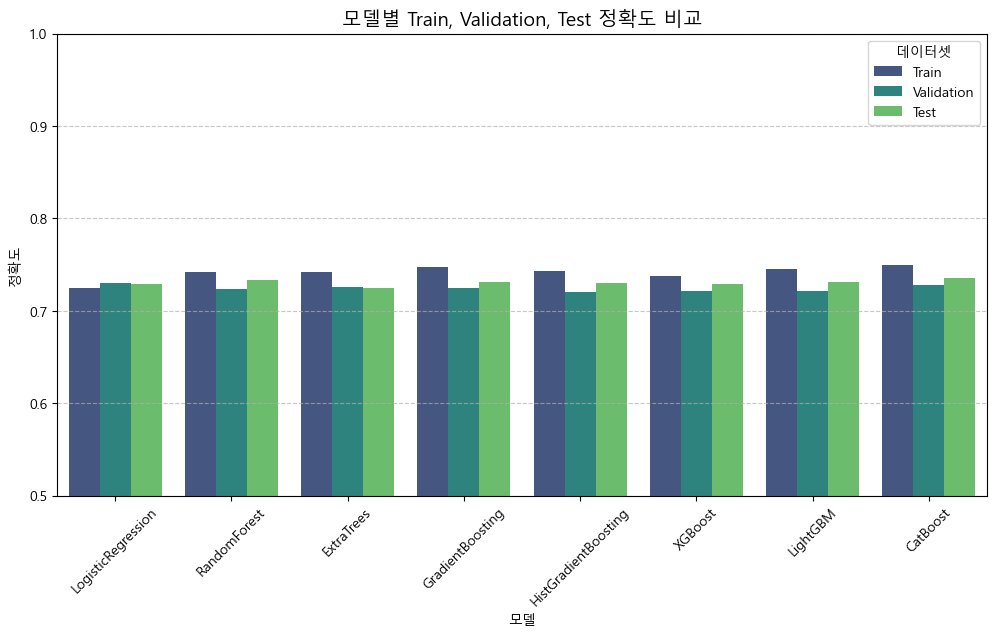

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기
df_results = pd.read_csv("모델별 평가결과.csv")

# 시각화 설정
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=df_results, palette="viridis")

# 그래프 설정
plt.title("모델별 Train, Validation, Test 정확도 비교", fontsize=14)
plt.xlabel("모델")
plt.ylabel("정확도")
plt.ylim(0.5, 1.0)  # 정확도 범위 (0.5~1.0)
plt.xticks(rotation=45)  # 모델 이름 가독성 증가
plt.legend(title="데이터셋")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()


#### 모델별 평가결과 선 그래프 시각화

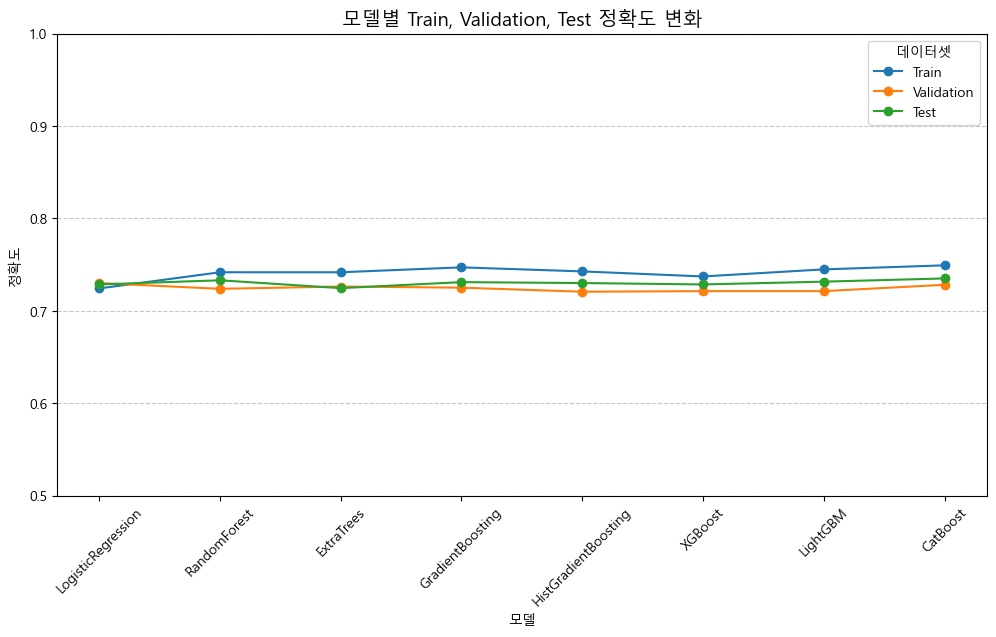

In [45]:
plt.figure(figsize=(12, 6))

# 모델별 정확도를 선 그래프로 표현
for dataset in ["Train", "Validation", "Test"]:
    subset = df_results[df_results["Dataset"] == dataset]
    plt.plot(subset["Model"], subset["Accuracy"], marker="o", label=dataset)

# 그래프 설정
plt.title("모델별 Train, Validation, Test 정확도 변화", fontsize=14)
plt.xlabel("모델")
plt.ylabel("정확도")
plt.ylim(0.5, 1.0)  # 정확도 범위 설정
plt.xticks(rotation=45)  # 모델 이름 기울이기
plt.legend(title="데이터셋")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()


#### AUC 시각화 (ROC 곡선 그리기)

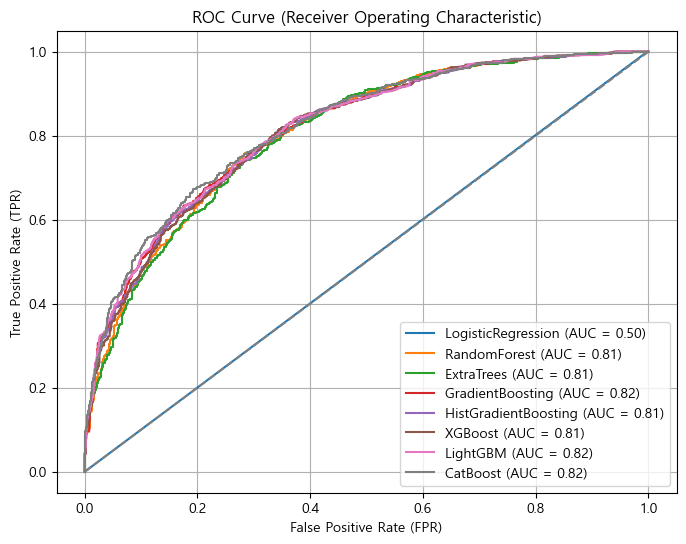

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 모델별 ROC 곡선 그리기
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # 확률 예측이 가능한 모델만
        y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스(1)의 확률
        fpr, tpr, _ = roc_curve(y_test, y_prob)  # FPR, TPR 계산
        auc_score = roc_auc_score(y_test, y_prob)  # AUC 계산
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# ROC 곡선 기본 설정
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 랜덤 분류기 기준선
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Receiver Operating Characteristic)")
plt.legend()
plt.grid()

# 그래프 출력
plt.show()